In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
from top2vec import Top2Vec
import pandas as pd
import numpy as np
import correlation
import random

random.seed(42);

In [43]:
folder = "files/"
sentiments = pd.read_csv(folder + "sentimented_tweets_with_stopwords.csv")
stocks = pd.read_csv(folder + "clean_stocks.csv")

In [44]:
model = Top2Vec(list(sentiments.tweet), embedding_model='universal-sentence-encoder-multilingual')
topic_sizes, topic_nums = model.get_topic_sizes()
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["tesla"], num_topics=10)
topic_words[:3]

2021-12-02 19:32:49,261 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/home/maksat.kengeskanov/.conda/envs/ml_project/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2021-12-02 19:32:49,849 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
2021-12-02 19:32:51,634 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2021-12-02 19:32:53,324 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2021-12-02 19:33:00,955 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:F

[array(['tesla', 'teslaownerssv', 'teslamotors', 'autopilot', 'teslarati',
        'electric', 'test', 'testing', 'solar', 'auto', 'cars', 'battery',
        'thirdrowtesla', 'mayemusk', 'evafoxu', 'vehicle', 'car', 'amp',
        'false', 'spacex', 'rocket', 'driving', 'carmack', 'wow', 'raptor',
        'model', 'nichegamer', 'moon', 'power', 'truth', 'km', 'max',
        'kristennetten', 'yet', 'fsd', 'drive', 'true', 'future',
        'production', 'miles', 'annerajb', 'flcnhvy', 'owners',
        'fredericlambert', 'wrong', 'self', 'giga', 'dmc',
        'erdayastronaut', 'already'], dtype='<U15'),
 array(['ll', 'doesn', 'teslarati', 're', 'isn', 'don', 'get', 'out', 'ai',
        'wow', 'imo', 'it', 'over', 'do', 'the', 'way', 'well', 'be',
        'didn', 'far', 'la', 'sn', 'off', 'away', 'thrust', 'getting',
        'djsnm', 'take', 'an', 'own', 'made', 'been', 'make', 'cape',
        'thing', 'its', 'like', 'matter', 'about', 'at', 'being', 'up',
        'mayemusk', 'of', 'sup

In [45]:
print("Topic Scores:", topic_scores)
print("Topics Nums:", topic_nums)
tesla = pd.DataFrame(columns = ['tweet', 'score', 'id'])
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=topic_nums[0], num_docs = topic_sizes[topic_nums[0]])
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    tesla = tesla.append({'tweet': doc, 'score': score, 'id': doc_id}, ignore_index = True)
tesla.head()

Topic Scores: [0.7814787  0.54909751 0.39137204 0.38706438 0.38092933 0.37413651
 0.34850109 0.34643392 0.34420362 0.33781007]
Topics Nums: [ 0 17  3 14 91 12 22 48  9 90]


,tweet,score,id
0,teslaownersSV Teslatunity Tesla Absolutely,0.899386,4590
1,TeslaOwnersSK Tesla Sorry it took so long,0.886079,4518
2,teslaownersSV Tesla Whoa cool,0.875430,5569
3,"WillFealey Tesla TeslaOwnersUK Wow, that s rea...",0.873125,7757
4,tesla adri teslaownersSV Yes,0.871795,631


In [46]:
t2v_best = sentiments.merge(tesla, on ="tweet", how = "inner")
t2v_best.head()

,date,tweet,language,hashtags,cashtags,link,retweet,nlikes,nreplies,nretweets,reply_to,textblob_sentiment,bertweet_sentiment,distilbert_sentiment,score,id
0,2021-03-19 06:08:53,teslaownersSV,und,[],[],https://twitter.com/elonmusk/status/1372792170...,False,3143,189,128,"[{'screen_name': 'teslaownersSV', 'name': 'Tes...",0,0,1,0.763102,5524
1,2021-03-19 06:08:53,teslaownersSV,und,[],[],https://twitter.com/elonmusk/status/1372792170...,False,3143,189,128,"[{'screen_name': 'teslaownersSV', 'name': 'Tes...",0,0,1,0.763102,25
2,2019-06-01 00:03:04,teslaownersSV,und,[],[],https://twitter.com/elonmusk/status/1134611281...,False,2362,57,42,"[{'screen_name': 'teslaownersSV', 'name': 'Tes...",0,0,1,0.763102,5524
3,2019-06-01 00:03:04,teslaownersSV,und,[],[],https://twitter.com/elonmusk/status/1134611281...,False,2362,57,42,"[{'screen_name': 'teslaownersSV', 'name': 'Tes...",0,0,1,0.763102,25
4,2021-03-11 13:53:21,tesla adri delayslater TrevorMahlmann SpacePad...,de,[],[],https://twitter.com/elonmusk/status/1370009954...,False,2539,246,115,"[{'screen_name': 'tesla_adri', 'name': 'Tesla_...",0,0,-1,0.668613,70


In [47]:
t2v_best.date = pd.to_datetime(t2v_best.date).dt.normalize()
stocks.date = pd.to_datetime(stocks.date)
df = pd.merge(t2v_best, stocks, on = 'date', how = 'inner')
df['top2vec'] = 1
df.head()

,date,tweet,language,hashtags,cashtags,link,retweet,nlikes,nreplies,nretweets,...,bertweet_sentiment,distilbert_sentiment,score,id,open,high,low,close,adj,top2vec
0,2021-03-19,teslaownersSV,und,[],[],https://twitter.com/elonmusk/status/1372792170...,False,3143,189,128,...,0,1,0.763102,5524,646.599976,657.22998,624.619995,654.869995,654.869995,1
1,2021-03-19,teslaownersSV,und,[],[],https://twitter.com/elonmusk/status/1372792170...,False,3143,189,128,...,0,1,0.763102,25,646.599976,657.22998,624.619995,654.869995,654.869995,1
2,2019-06-01,teslaownersSV,und,[],[],https://twitter.com/elonmusk/status/1134611281...,False,2362,57,42,...,0,1,0.763102,5524,37.061001,37.66000,36.109000,36.413000,36.413000,1
3,2019-06-01,teslaownersSV,und,[],[],https://twitter.com/elonmusk/status/1134611281...,False,2362,57,42,...,0,1,0.763102,25,37.061001,37.66000,36.109000,36.413000,36.413000,1
4,2021-03-11,tesla adri delayslater TrevorMahlmann SpacePad...,de,[],[],https://twitter.com/elonmusk/status/1370009954...,False,2539,246,115,...,0,-1,0.668613,70,699.400024,702.50000,677.179993,699.599976,699.599976,1


In [48]:
methods = ['top2vec']
cramer = correlation.find_correlation(df, methods).sort_values('cramer', ascending=False).reset_index(drop = True)
cramer

,method,cluster,type,cramer,percent_change,delay
0,top2vec,1,bertweet_sentiment,0.08504,1,1
1,top2vec,1,bertweet_sentiment,0.07926,0.5,1
2,top2vec,1,bertweet_sentiment,0.07296,1.5,1
3,top2vec,1,bertweet_sentiment,0.07231,0,1
4,top2vec,1,bertweet_sentiment,0.06343,2,1
5,top2vec,1,bertweet_sentiment,0.06228,0.5,3
6,top2vec,1,textblob_sentiment,0.05787,0,1
7,top2vec,1,bertweet_sentiment,0.04950,1.5,3
8,top2vec,1,bertweet_sentiment,0.04799,2,2
9,top2vec,1,bertweet_sentiment,0.04784,0.5,2


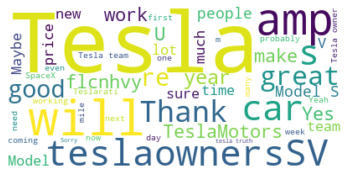

In [49]:
correlation.generate_wordcloud(df, 'top2vec', 1)